GDS files generated: file1.gds & file2.gds


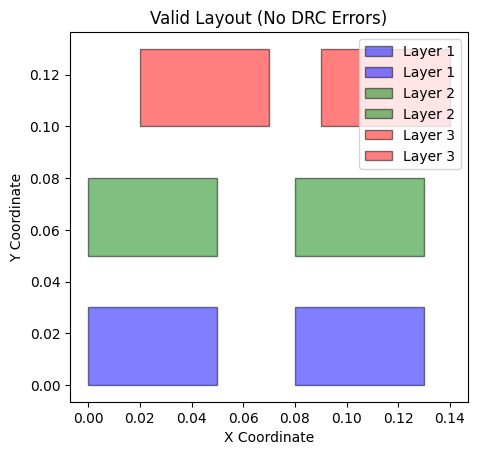

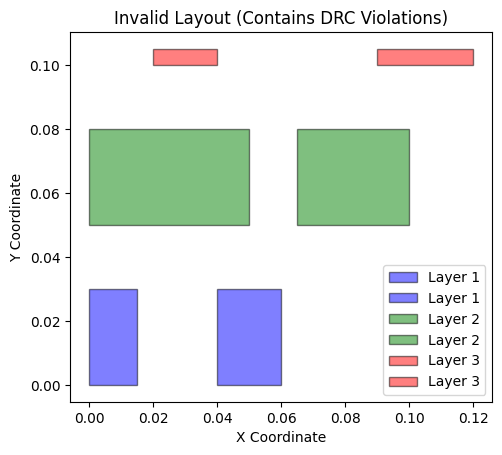

In [1]:
import gdspy
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon as ShapelyPolygon

# Define GDS Library
lib = gdspy.GdsLibrary()

# --- Function to Create Valid Layout ---
def create_valid_layout():
    cell = lib.new_cell("VALID")

    # Layer 1: Proper width and spacing
    rect1 = gdspy.Rectangle((0, 0), (0.05, 0.03), layer=1)  # Width 0.05 (Valid)
    rect2 = gdspy.Rectangle((0.08, 0), (0.13, 0.03), layer=1)  # Spacing 0.03 (Valid)

    # Layer 2: Proper width and spacing
    rect3 = gdspy.Rectangle((0, 0.05), (0.05, 0.08), layer=2)  # Width 0.05 (Valid)
    rect4 = gdspy.Rectangle((0.08, 0.05), (0.13, 0.08), layer=2)  # Spacing 0.03 (Valid)

    # Layer 3: Proper area
    rect5 = gdspy.Rectangle((0.02, 0.10), (0.07, 0.13), layer=3)  # Area 0.0015 (Valid)
    rect6 = gdspy.Rectangle((0.09, 0.10), (0.14, 0.13), layer=3)  # Well-spaced (Valid)

    cell.add([rect1, rect2, rect3, rect4, rect5, rect6])
    return cell

# --- Function to Create Invalid Layout ---
def create_invalid_layout():
    cell = lib.new_cell("INVALID")

    # Layer 1: Width too small (Violation)
    rect1 = gdspy.Rectangle((0, 0), (0.015, 0.03), layer=1)  # Width 0.015 (Too small)
    rect2 = gdspy.Rectangle((0.04, 0), (0.06, 0.03), layer=1)  # Width barely valid

    # Layer 2: Spacing too small (Violation)
    rect3 = gdspy.Rectangle((0, 0.05), (0.05, 0.08), layer=2)  # Valid
    rect4 = gdspy.Rectangle((0.065, 0.05), (0.10, 0.08), layer=2)  # Spacing 0.015 (Too close)

    # Layer 3: Area too small (Violation)
    rect5 = gdspy.Rectangle((0.02, 0.10), (0.04, 0.105), layer=3)  # Area 0.0002 (Too small)
    rect6 = gdspy.Rectangle((0.09, 0.10), (0.12, 0.105), layer=3)  # Height too small

    cell.add([rect1, rect2, rect3, rect4, rect5, rect6])
    return cell

# Create and save layouts
valid_cell = create_valid_layout()
invalid_cell = create_invalid_layout()

lib.write_gds("file1.gds")
lib.write_gds("file2.gds")

print("GDS files generated: file1.gds & file2.gds")

# --- Visualization using Matplotlib ---
def plot_layout(cell, title):
    fig, ax = plt.subplots()
    colors = {1: "blue", 2: "green", 3: "red"}  # Define colors for layers

    for polygon in cell.polygons:
        layer = polygon.layers[0]
        color = colors.get(layer, "gray")
        for p in polygon.polygons:
            shapely_poly = ShapelyPolygon(p)
            x, y = shapely_poly.exterior.xy
            ax.fill(x, y, color, edgecolor='k', alpha=0.5, label=f'Layer {layer}')

    ax.set_title(title)
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()
    ax.set_aspect("equal")
    plt.show()

# Plot the two layouts
plot_layout(valid_cell, "Valid Layout (No DRC Errors)")
plot_layout(invalid_cell, "Invalid Layout (Contains DRC Violations)")
